In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Import data

In [2]:
cars_data = pd.read_csv('cars.csv')

In [3]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# Data understanding

### Initial analysis

In [4]:
cars_data.shape

(81, 5)

In [5]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [7]:
cars_data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


## Assumption Check

 ### Normality test
 
 
 1. Displot(Histogram)
 
 2. QQ-plot
 
 3. probplot

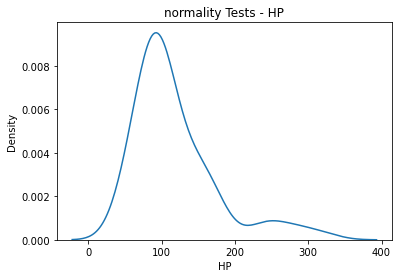

In [8]:
sns.distplot(a=cars_data['HP'],hist = False)
plt.title("normality Tests - HP")
plt.show()

In [9]:
cars_data['HP'].skew()

1.7162163889158817

In [10]:
cars_data["HP"].kurtosis()

2.960024672046334

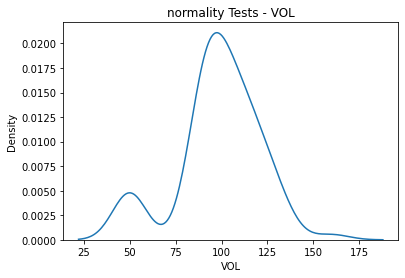

In [11]:
sns.distplot(a=cars_data['VOL'],hist = False)
plt.title("normality Tests - VOL")
plt.show()

In [12]:
cars_data['VOL'].skew()

-0.5901968186877561

In [13]:
cars_data["VOL"].kurtosis()

0.9202285729168072

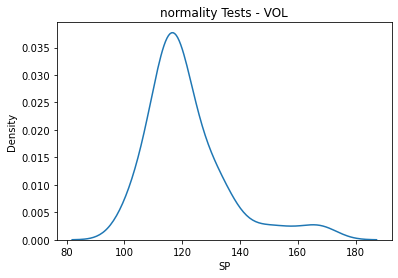

In [14]:
sns.distplot(a=cars_data['SP'],hist = False)
plt.title("normality Tests - VOL")
plt.show()

In [15]:
cars_data['SP'].skew()

1.6114501961773555

In [16]:
cars_data["SP"].kurtosis()

2.9773289437871764

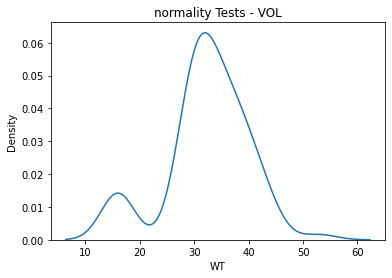

In [17]:
sns.distplot(a=cars_data['WT'],hist = False)
plt.title("normality Tests - VOL")
plt.show()

In [18]:
cars_data['WT'].skew()

-0.6147533255357768

In [19]:
cars_data["WT"].kurtosis()

0.9502914910300326

## Normality test using probplot

In [20]:
from scipy import stats

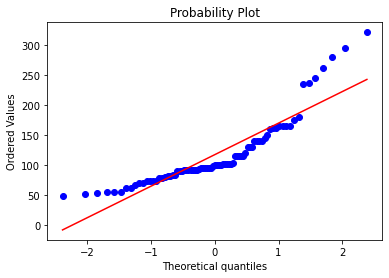

In [21]:
stats.probplot(x=cars_data['HP'],dist='norm',plot = plt)
plt.show()

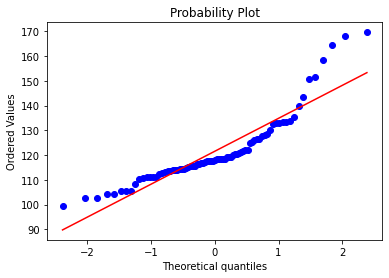

In [22]:
stats.probplot(x=cars_data['SP'],dist='norm',plot = plt)
plt.show()

## Normality test failed

# 2. Linearity test

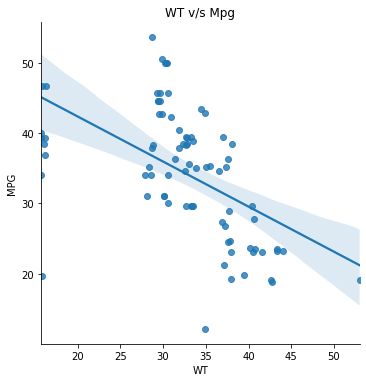

In [23]:
sns.lmplot(x= "WT",y='MPG',data=cars_data)
plt.title('WT v/s Mpg')
plt.show()

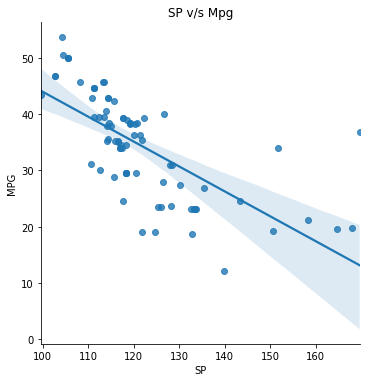

In [24]:
sns.lmplot(x= "SP",y='MPG',data=cars_data)
plt.title('SP v/s Mpg')
plt.show()

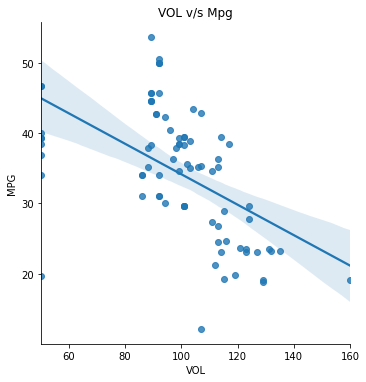

In [25]:
sns.lmplot(x= "VOL",y='MPG',data=cars_data)
plt.title('VOL v/s Mpg')
plt.show()

## Linearity test failed

## 3. Multicollinearity Test



can be performed by using 2 tecniques:


1. correlation Matrix

2. variation inflation factor[VIF]

In [26]:
car_data_matrix = cars_data.corr().round(2)

<AxesSubplot:>

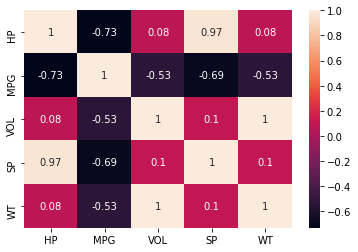

In [27]:
sns.heatmap(car_data_matrix ,annot=True)

#### Multi collinearity problem Exits

## Autoregression Test - No time based inputs

## homoscedasticity check || Zero Residual Check

This can be done post model Training

# Lets create reference data to understand how the X features should behave with y

In [28]:
import numpy as np

In [29]:
cars_data.shape

(81, 5)

In [30]:
x = np.random.randn(83)
y =10*x+np.random.randn(83)*2

In [31]:
x
y

array([  6.97382184,   1.75025703,   9.24629248,   0.95593435,
        11.66395757, -15.52766337,   5.11025387, -11.09784696,
        15.5243215 ,   8.52692482,  13.22401287,  -0.48209849,
        -4.12287358,   5.70683183,   8.15803544,  -5.45443394,
         7.38854267,   0.59769228,  12.9178553 , -12.09431621,
         0.7943838 ,   8.83683584,   3.97041937,  -6.24808617,
         8.48919227,   0.92832036,  -9.0430939 ,  16.29778126,
        -3.55957454,  14.16773433,  -1.28843116,  -2.09922486,
        12.86563563, -12.16245623, -12.46639742,  -1.14278019,
        -2.72885144,  11.80678466,   3.77132567,   0.23230851,
        -0.53206684,  -5.481853  ,  12.25605541, -19.94607799,
        26.52497416,  19.02572916, -16.11234858,  13.58585648,
        -8.30183443,  -9.28979452,  -0.62979384,   9.44452862,
        -4.33398437,  -0.99451624,  11.36960637,   9.12835865,
       -10.34782048,  13.99815285,  -1.70613996,   9.31896193,
        -4.13673114,   7.39086852,   2.37222166,   0.69

In [32]:
x_df = pd.DataFrame(data = [x,y]).T
x_df.columns = ['x','y']
x_df

,x,y
0,0.867937,6.973822
1,0.437562,1.750257
2,0.642101,9.246292
3,0.405801,0.955934
4,1.055865,11.663958
...,...,...
78,-0.070685,0.959193
79,1.662499,17.950266
80,-0.971031,-10.053046
81,-0.852671,-7.539949


In [33]:
## Linearity Test - passed

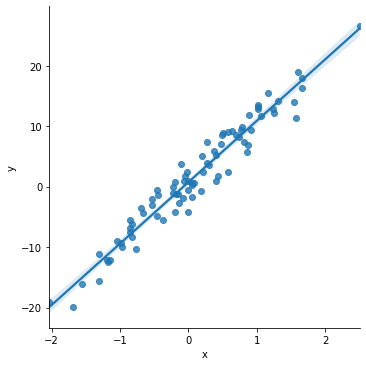

In [34]:
sns.lmplot(x = 'x',y='y',data=x_df)

In [35]:
# Normality Test

<AxesSubplot:xlabel='x', ylabel='Density'>

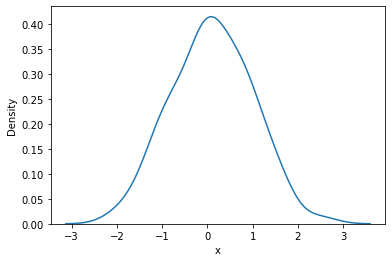

In [36]:
sns.distplot(a= x_df['x'],hist = False)

In [37]:
x_df.skew()

x    0.024561
y   -0.057805
dtype: float64

In [38]:
x_df.kurtosis()

x   -0.194143
y   -0.149822
dtype: float64

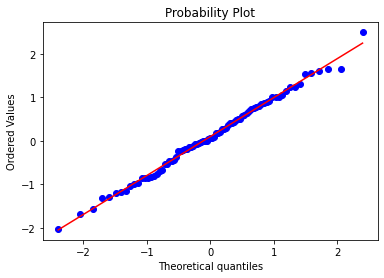

In [39]:
stats.probplot(x=x_df['x'],dist='norm',plot=plt)
plt.show()

## Multicollinearity TEst- passed

## Autoregression Test -passed

# Homoscedasticity Test || Zero residual Mean Test

## Model Building 

In [46]:
x = x_df[['x']]
y = x_df[['y']]
x

,x
0,0.867937
1,0.437562
2,0.642101
3,0.405801
4,1.055865
...,...
78,-0.070685
79,1.662499
80,-0.971031
81,-0.852671


In [47]:
y

,y
0,6.973822
1,1.750257
2,9.246292
3,0.955934
4,11.663958
...,...
78,0.959193
79,17.950266
80,-10.053046
81,-7.539949


## model Training using sklearn technique

In [48]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x,y)

LinearRegression()

In [50]:
linear_model.intercept_

array([0.75163989])

In [51]:
linear_model.coef_

array([[10.16851935]])

## Model Testing

In [53]:
y_pred = linear_model.predict(x)

## Model Evaluation

In [54]:
y

,y
0,6.973822
1,1.750257
2,9.246292
3,0.955934
4,11.663958
...,...
78,0.959193
79,17.950266
80,-10.053046
81,-7.539949


In [56]:
error = y-y_pred
error

,y
0,-2.603455
1,-3.450743
2,1.965433
3,-3.922101
4,0.175729
...,...
78,0.926315
79,0.293477
80,-0.930743
81,0.378812


### Homoscedasticity Check

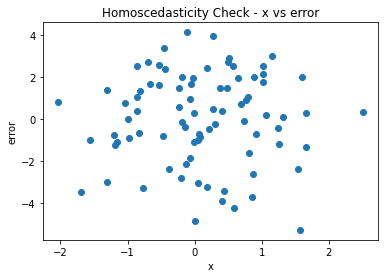

In [59]:
plt.scatter(x=x_df['x'],y = error)
plt.title('Homoscedasticity Check - x vs error')
plt.xlabel('x')
plt.ylabel('error')
plt.show()

## Zero Residual Mean

it is a plot between actual output vs predicted plot

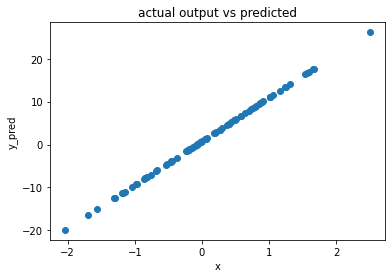

In [60]:
plt.scatter(x=x_df['x'],y = y_pred)
plt.title('actual output vs predicted')
plt.xlabel('x')
plt.ylabel('y_pred')
plt.show()

## Zero residual test passed

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Cars data

In [62]:
x = cars_data.drop(['MPG'],axis =1)
y = cars_data[['MPG']]

### Model building

In [ ]:
x =cars_data.drop(['MPG'],axis = 1)
y = cars_data[["MPG"]]

In [74]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_scaled=std_scaler.fit_transform(x)
x_scaled=pd.DataFrame(data =x_scaled,columns = x.columns)
x_scaled

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [ ]:
## Before scaling

In [75]:
x.mean()

HP     117.469136
VOL     98.765432
SP     121.540272
WT      32.412577
dtype: float64

In [76]:
x.std()

HP     57.113502
VOL    22.301497
SP     14.181432
WT      7.492813
dtype: float64

In [77]:
#after scaling
x_scaled.mean()

HP    -1.041691e-16
VOL    5.825244e-17
SP     1.946317e-16
WT     1.170531e-15
dtype: float64

In [79]:
x_scaled.std()

HP     1.006231
VOL    1.006231
SP     1.006231
WT     1.006231
dtype: float64

## Model Training

In [80]:
linear_mod = LinearRegression()
linear_mod.fit(x_scaled,y)

LinearRegression()

In [81]:
linear_mod.coef_

array([[-11.66095549,  -7.44803145,   5.57581553,   2.98284187]])

In [82]:
linear_mod.intercept_

array([34.42207573])

# model testing

In [83]:
y_pred = linear_mod.predict(x_scaled)
y_pred

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

 ### Model evaluation

In [69]:
error =y-y_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


## Homoscedacity check

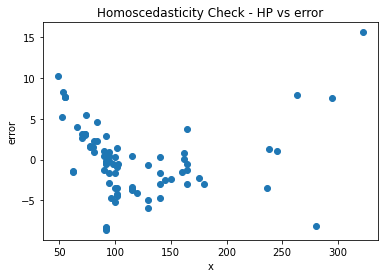

In [84]:
plt.scatter(x=cars_data['HP'],y = error)
plt.title('Homoscedasticity Check - HP vs error')
plt.xlabel('HP')
plt.ylabel('error')
plt.show()

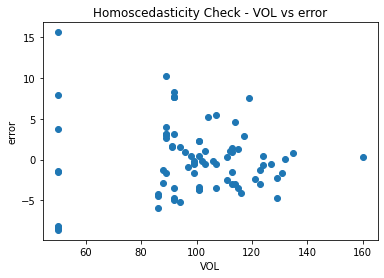

In [85]:
plt.scatter(x=cars_data['VOL'],y = error)
plt.title('Homoscedasticity Check - VOL vs error')
plt.xlabel('VOL')
plt.ylabel('error')
plt.show()

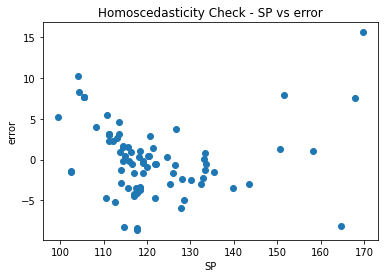

In [86]:
plt.scatter(x=cars_data['SP'],y = error)
plt.title('Homoscedasticity Check - SP vs error')
plt.xlabel('SP')
plt.ylabel('error')
plt.show()

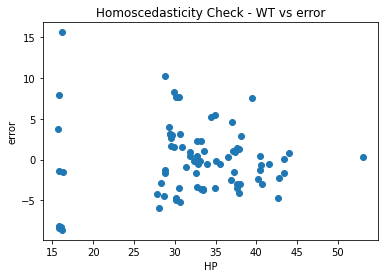

In [87]:
plt.scatter(x=cars_data['WT'],y = error)
plt.title('Homoscedasticity Check - WT vs error')
plt.xlabel('HP')
plt.ylabel('error')
plt.show()

In [88]:
## HOMOSCEDATICITY TEST FAILED

## Zero Residual Mean

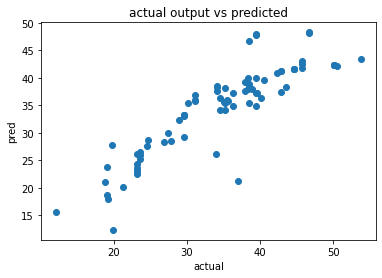

In [89]:
plt.scatter(x=y,y = y_pred)
plt.title('actual output vs predicted')
plt.xlabel('actual')
plt.ylabel('pred')
plt.show()

## =======================================================================================================